<a href="https://colab.research.google.com/github/Elisakova/github_welcom/blob/main/Titanic_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [9]:
train=pd.read_csv('/content/drive/MyDrive/Иннополис/Titanic/train.csv')
test=pd.read_csv('/content/drive/MyDrive/Иннополис/Titanic/test.csv')

In [10]:
#проверить тип данных
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
from pandas.core.internals.managers import Shape
#размер датафрейма
train.shape

(891, 12)

In [16]:
# количество пропущенных  значений 
stat_null=train.isnull().sum()/train.shape[0]
stat_null.reset_index().sort_values(0, ascending=False)

,index,0
10,Cabin,0.771044
5,Age,0.198653
11,Embarked,0.002245
0,PassengerId,0.000000
1,Survived,0.000000
2,Pclass,0.000000
3,Name,0.000000
4,Sex,0.000000
6,SibSp,0.000000
7,Parch,0.000000


In [17]:
# выводим описательнную  статистику  по номинальным  переменным
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [24]:
from re import X
#Если переменная  содержит много пропусков нужно провести дополнительный анализ  влияет ли этот признак на  целевую переменную
train['is_null_cabin']=train['Cabin'].map(lambda x: 1 if pd.isna(x) else 0)
pd.crosstab(train.is_null_cabin,
            train.Survived) / train.shape[0]

Survived,0,1
is_null_cabin,,
0,0.076319,0.152637
1,0.539843,0.231201


In [25]:
pd.crosstab(train.is_null_cabin,
            train.Pclass)# зависимость  незаполненной переменной от  класса  билета 

Pclass,1,2,3
is_null_cabin,,,
0,176,16,12
1,40,168,479


In [40]:
#C = Cherbourg, Q = Queenstown, S = Southampton
pd.crosstab(train.is_null_cabin, 
            train.Embarked)

Embarked,C,Q,S
is_null_cabin,,,
0,69,4,129
1,99,73,515


In [41]:
pd.crosstab(train.Pclass,
            train.Embarked)

Embarked,C,Q,S
Pclass,,,
1,85,2,127
2,17,3,164
3,66,72,353


In [47]:
train['is_null_age']=train['Age'].map(lambda x: 1 if pd.isna(x) else 0)
pd.crosstab(train.is_null_age,
            train.Survived)

Survived,0,1
is_null_age,,
0,424,290
1,125,52


In [48]:
pd.crosstab(train.is_null_age,
            train.Pclass)

Pclass,1,2,3
is_null_age,,,
0,186,173,355
1,30,11,136


In [49]:
train[train['Ticket']=='347082']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_null_cabin,is_null_age
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S,1,0
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S,1,0
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S,1,0
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S,1,0
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S,1,0
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S,1,0
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S,1,0


In [51]:
# зависимость фичей от целевого признака  пол и выживаемость 
train.groupby(['Sex','Survived'])['Survived'].count() /train.shape[0]

Sex     Survived
female  0           0.090909
        1           0.261504
male    0           0.525253
        1           0.122334
Name: Survived, dtype: float64

Процент выживаемости  женщин выше чем у мужчин 

In [54]:
# класс пассажира 
train.groupby(['Pclass','Survived'])['Survived'].count()/train.shape[0]

Pclass  Survived
1       0           0.089787
        1           0.152637
2       0           0.108866
        1           0.097643
3       0           0.417508
        1           0.133558
Name: Survived, dtype: float64

Пассажиры  1 класса выживали чаще 

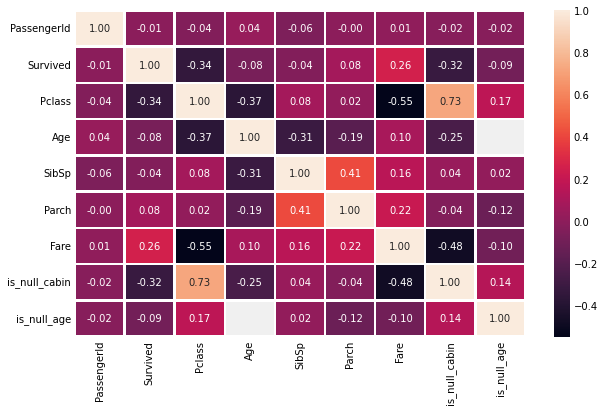

In [59]:
# смотрим корреляцию  интервальных  переменных  Пирсена
corr=train.corr()
f, ax= plt.subplots(figsize=(9,6))
sns.heatmap(corr,
            annot=True,
            linewidths=1.5 ,
            fmt='.2f',
            ax=ax)
plt.show()

In [60]:
#Детальный анализ переменной Возраст
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

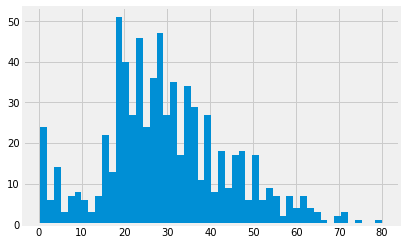

In [62]:
train['Age'].hist(bins=50)

In [64]:
from numpy.ma.core import shape
train[train['Age']<1].shape

(7, 14)

In [65]:
train[train['Age']<1]['Survived'].describe()

count    7.0
mean     1.0
std      0.0
min      1.0
25%      1.0
50%      1.0
75%      1.0
max      1.0
Name: Survived, dtype: float64

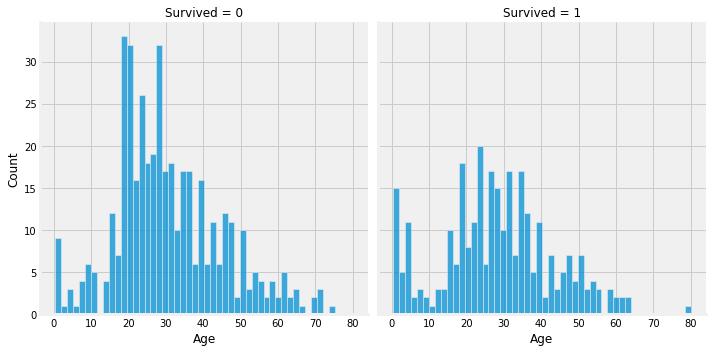

In [66]:
sns.displot(train, x='Age', col='Survived', bins=50)